# 목표
- 폐암환자의 생존을 예측하는 모델을 만들어보자!
- 신경망을 활용하여 2진분류 문제를 해결해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# header : 데이터프레임에서 컬럼명을 설정해주는 함수(None : 인덱스 번호로 출력)
data = pd.read_csv("DataFiles/ThoraricSurgery.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [3]:
data.shape

(470, 18)

In [4]:
X = data.iloc[:, :-1]   #[행의범위, 열의범위]
y = data.iloc[:, -1]

In [5]:
X.shape, y.shape

((470, 17), (470,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 17)
(118, 17)
(352,)
(118,)


# keras를 활용하여 딥러닝 신경망을 구성해보자!
- 1. 신경망 구조 설계
- 2. 학습/평가방법 설정
- 3. 학습 + 시각화
- 4. 모델평가

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
#1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층(Dense)
# 첫 입력층(데이터의 특성 개수) input_dim(17) , 10(다음 층 뉴런 10개)
# activation : 활성화함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)

model.add(Dense(10, input_dim=17, activation="sigmoid"))

# 중간층
model.add(Dense(6, activation="sigmoid")) # 하나의 층
model.add(Dense(4, activation="sigmoid")) # 하나의 층

# 출력층
# 출력층은 회귀(활성화함수x), 2진분류(sigmoid), 다중분류에 따라서 사용하는 함수가 달라짐
model.add(Dense(1, activation="sigmoid")) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


## activation(활성화함수) - 자극에 대한 반응여부를 결정하는 함수
- 1. 회귀 : linear(항등함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
- 2. 분류 -> 딥러닝은 선형 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치 값으로는 분류 문제를 예측하기 힘듦
    - 분류 모델은 확률 정보를 가지고 판단하는 것이 더욱 정확
    - 이진분류 : sigmoid -> 0또는 1로 분류(0.5를 기준으로 높고 낮은지에 대한 확률 정보를 바탕으로 최종 출력을 결정)

### 신경망 학습/평가 방법 설정

In [11]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="binary_crossentropy",  
             optimizer = "SGD",   # 최적화 함수 : 확률적경사하강법 사용
              metrics=["acc"]      # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

###  학습 및 학습과정 

In [12]:
h = model.fit(X_train, y_train, epochs=100) # epochs : 학습 횟수를 설정

Train on 352 samples
Epoch 1/100
352/352 [==============================] - 1s 3ms/sample - loss: 0.5992 - acc: 0.8580
Epoch 2/100
352/352 [==============================] - 0s 59us/sample - loss: 0.5792 - acc: 0.8580
Epoch 3/100
352/352 [==============================] - 0s 71us/sample - loss: 0.5615 - acc: 0.8580
Epoch 4/100
352/352 [==============================] - 0s 65us/sample - loss: 0.5458 - acc: 0.8580
Epoch 5/100
352/352 [==============================] - 0s 60us/sample - loss: 0.5319 - acc: 0.8580
Epoch 6/100
352/352 [==============================] - 0s 68us/sample - loss: 0.5195 - acc: 0.8580
Epoch 7/100
352/352 [==============================] - 0s 60us/sample - loss: 0.5086 - acc: 0.8580
Epoch 8/100
352/352 [==============================] - 0s 60us/sample - loss: 0.4988 - acc: 0.8580
Epoch 9/100
352/352 [==============================] - 0s 68us/sample - loss: 0.4901 - acc: 0.8580
Epoch 10/100
352/352 [==============================] - 0s 54us/sample - loss: 0.4822 - a

352/352 [==============================] - 0s 60us/sample - loss: 0.4086 - acc: 0.8580
Epoch 83/100
352/352 [==============================] - 0s 60us/sample - loss: 0.4086 - acc: 0.8580
Epoch 84/100
352/352 [==============================] - 0s 63us/sample - loss: 0.4086 - acc: 0.8580
Epoch 85/100
352/352 [==============================] - 0s 57us/sample - loss: 0.4086 - acc: 0.8580
Epoch 86/100
352/352 [==============================] - 0s 62us/sample - loss: 0.4086 - acc: 0.8580
Epoch 87/100
352/352 [==============================] - 0s 68us/sample - loss: 0.4086 - acc: 0.8580
Epoch 88/100
352/352 [==============================] - 0s 51us/sample - loss: 0.4085 - acc: 0.8580
Epoch 89/100
352/352 [==============================] - 0s 60us/sample - loss: 0.4086 - acc: 0.8580
Epoch 90/100
352/352 [==============================] - 0s 65us/sample - loss: 0.4085 - acc: 0.8580
Epoch 91/100
352/352 [==============================] - 0s 62us/sample - loss: 0.4085 - acc: 0.8580
Epoch 92/100


### 시각화

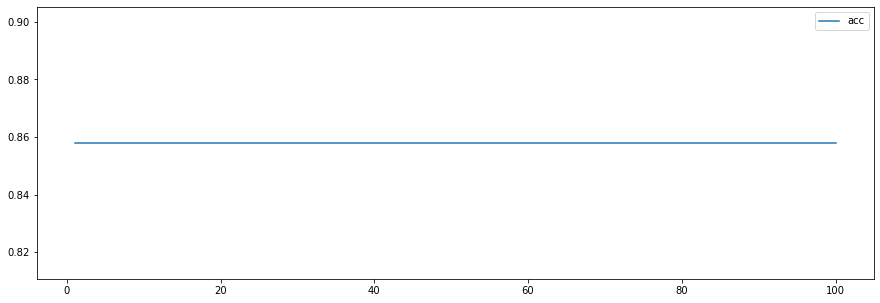

In [18]:
# 시각화
plt.figure(figsize=(15,5))

# 라인 차트를 생성
plt.plot(range(1,101),  # epochs 가 100까지 설정을 했기 때문에
            h.history['acc'],    # history : 학습시 출력되는 loss 혹은 정확도 값을 가져오기 위한 명령
            label='acc')
plt.legend() # 범례표시
plt.show()

### 모델평가 

In [16]:
model.evaluate(X_test, y_test)

118/118 [==============================] - 0s 307us/sample - loss: 0.4571 - acc: 0.8305


[0.4571263123366792, 0.8305085]